# Introduction

With the popularity of healthy lifestyle, people are more and more concerned about their daily exercise.  Among them, the number of steps, as a simple and easy to obtain health indicator, has been adopted by the majority of people. Especially in today's world, many smart wearables and apps can easily track users' daily steps, providing them with health feedback. This notebook aims to explore a fascinating question: "For these individuals, if they are more active in the morning, will their daily step count be higher?" In other words, we want to know if morning activity is associated with a person's overall daily activity.

Initially, we read step data from the 'hourlySteps_merged.csv' file and conducted some basic data cleaning and processing, such as converting the 'ActivityHour' column into a datetime format. We then grouped and analyzed the data by user ID, exploring user step data from various angles. For instance, we plotted a bar graph showing the average active hours for each user and a box plot to display the maximum steps per hour for different ID users. To specifically study the relationship between morning activity and daily steps, we extracted the steps of each user between 6 AM and 12 noon, calculating the total steps during this period. We also calculated the daily step count for each user. Using this data, we displayed the relationship between morning steps and daily steps with scatter plots and a fitting line and calculated the correlation coefficient. Lastly, we further explored the median step count. We divided users into two groups, one with a morning step median higher than the overall median and the other lower. Then, we drew a box plot for these two groups to show the distribution of daily steps for both and used a 2 sample t-test to assess whether the difference between the two groups was significant.


### Assumptions

- Assume the data file 'hourlySteps_merged.csv' is complete, and each record corresponds to a person's step count at a specific time.

- Assume each user's record is continuous without breaks. If a user's data is less than 24 hours, it might be due to device issues or other reasons.

- All step count data is assumed to be accurate, without human manipulation or errors.

- The time period from 6 AM to 12 AM can reflect a person's morning activity.

- The median is considered a good metric that can reflect the typical steps of users.

### Prediction:

People who are active in the morning will be more energetic in the morning, and they will have a higher step count throughout the day.

> Studies on exercise and biological rhythms provide insights into this issue. Atkinson and Speirs (1998) explored the performance of athletes at different times, indirectly revealing how active times might influence an individual's daily activity. The association between morning exercise and improved sleep quality (Youngstedt et al., 1997) suggests that morning activity might have a positive impact on daily activity and step counts.

# Code part

## Import Package
Import data modules from data to facilitate development, where pandas is used for data analysis, plt and sns are used for graphics processing and visualization and np is used for array calculations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import data file and check infomation for each columns
Use pd to import data from the csv file, and use the info method to view the data columns, missing values, and data types.

From the results obtained, we found that there are three columns in the data, namely id, time, and total number of steps. There are no missing values in the data because the count is in non-null format and there are 22099 columns. From the data type, we can observe that the format of id and stepTotal is int, while the format of ActivityHour is object.

In [4]:
step_hours = pd.read_csv('hourlySteps_merged.csv')
step_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


The following code helps us view the data for the first five columns, and it is worth noting from the data that activity hours are formatted as steps per hour. For our driving problems, just looking at steps per hour is not enough to answer our driving problems. For a more accurate estimate, we need to look at the number of steps per day and the number of steps in a specific time period, so for ease of programming. We need to change the format to datetime

In [5]:
step_hours.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In order to prevent the conversion from affecting the original data, copy is used to copy the original data, and then datetime is used to transform it. Then we can see from info that the data type has changed to datetime at this time

In [6]:
step_hours_copy = step_hours.copy()
step_hours_copy['ActivityHour'] = pd.to_datetime(step_hours_copy['ActivityHour'])
step_hours_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   StepTotal     22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


## Data Exploration

In order to accurately calculate the driving problem, the data needs to be explored and properly cleaned before analysis

### Number of days recorded for different IDs
According to previous research, each piece of data corresponds to a different hour of a different day. To explore the number of record days for different ids, we can divide the total number of record lines for different ids by 24 to get the different days.

From the data, we found that most people work for about 30 days. In order to view the data more intuitively, we can use histograms to view the distribution of the data

In [7]:
step_hours.groupby("Id")["ActivityHour"].count()/24

Id
1503960366    29.875000
1624580081    30.666667
1644430081    29.500000
1844505072    30.458333
1927972279    30.666667
2022484408    30.666667
2026352035    30.666667
2320127002    30.625000
2347167796    17.250000
2873212765    30.666667
3372868164    19.666667
3977333714    29.000000
4020332650    30.500000
4057192912     3.666667
4319703577    30.166667
4388161847    30.625000
4445114986    30.625000
4558609924    30.666667
4702921684    30.458333
5553957443    30.416667
5577150313    29.500000
6117666160    27.500000
6290855005    27.708333
6775888955    25.416667
6962181067    30.500000
7007744171    25.041667
7086361926    30.541667
8053475328    30.625000
8253242879    17.958333
8378563200    30.625000
8583815059    29.916667
8792009665    28.000000
8877689391    30.625000
Name: ActivityHour, dtype: float64

According to the results of the histogram, like what we have observed from the data, most of the data are recorded for about 30 days, but there are still some outliers, such as 5 data recorded for less than 20 days. However, these ids do not need to be recorded as outliers, because for our driven question, morning activities are not related to the number of days. We are more concerned about whether the daily data is normal.

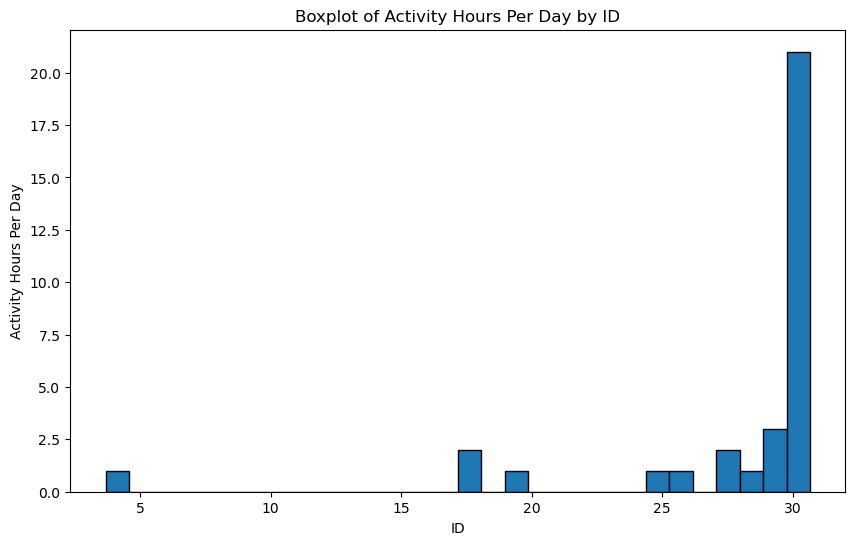

In [8]:
activity_hours_per_day = step_hours.groupby("Id")["ActivityHour"].count() / 24

plt.figure(figsize=(10, 6))
plt.hist(activity_hours_per_day, bins=30, edgecolor='black')

plt.xlabel('ID')
plt.ylabel('Activity Hours Per Day')
plt.title('Boxplot of Activity Hours Per Day by ID')
plt.show()

### Number of steps per hour with different IDs

The following data shows the number of steps per hour for different ids. For a more intuitive analysis. We need to block the data and visualize it.

In [9]:
step_hours.groupby("Id")["StepTotal"].describe()

,count,mean,std,min,25%,50%,75%,max
Id,,,,,,,,
1503960366,717.0,522.379358,836.484941,0.0,8.0,178.0,554.00,5934.0
1624580081,736.0,241.508152,760.458172,0.0,0.0,28.5,180.00,8976.0
1644430081,708.0,307.806497,589.610641,0.0,0.0,22.5,354.75,4660.0
1844505072,731.0,109.359781,232.059128,0.0,0.0,0.0,91.00,2043.0
1927972279,736.0,38.586957,164.172857,0.0,0.0,0.0,0.00,2109.0
2022484408,736.0,477.869565,861.297289,0.0,0.0,101.5,624.75,5596.0
2026352035,736.0,233.788043,321.686789,0.0,0.0,117.0,322.25,2375.0
2320127002,735.0,198.687075,277.884927,0.0,0.0,35.0,341.50,2208.0
2347167796,414.0,413.857488,749.229701,0.0,0.0,130.5,381.50,5291.0


Based on the definition of steps, our preliminary prediction is that everyone's minimum should be 0 because they need to sleep. According to the following results, the minimum values of 33 groups of data are all 0, which verifies that our conjecture is correct.

In [10]:
step_hours.groupby("Id")["StepTotal"].min().describe()

count    33.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: StepTotal, dtype: float64

The histogram below shows the highest number of steps per hour for different ids. It can be found from the figure that there is an outlier. Combined with the above table, it is found that this value comes from 8877689391, and its highest value is 10,554 steps. And according to Christine's post on September 20, 2022: [What Is a Good 10k Time for Beginners to Advanced Runners?](https://www.verywellfit.com/how-long-will-it-take-to-run-a-10k-2911115) It notes that the average runner's 10K time is about an hour. 
[Elliot Basser](https://healthybeat.com/fitness/steps-in-miles-kilometers/) puts it at 1,200-1,500 steps per kilometer. In other words, if 8877689391 is a continuous run for an hour, the data of 10054 is possible. So there are no outliers.




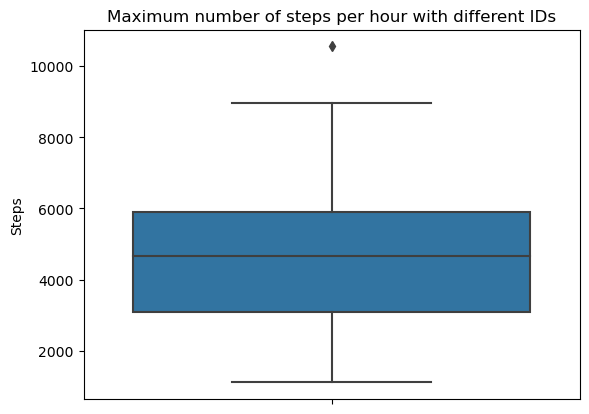

In [11]:
max_distribution = step_hours.groupby("Id")["StepTotal"].max()

sns.boxplot(y=max_distribution)

plt.ylabel('Steps')
plt.title('Maximum number of steps per hour with different IDs')
plt.show()

## Data Conversion

Because the number of steps per hour is not enough to answer our driving questions. Therefore, some transformation of the data is required, mainly to merge according to time. To meet the data needs of driving problems.

To explore our driving problems, whether more activity in these people in the morning was more activity throughout the day. We first need to define the definition of morning, generally speaking, we think that the definition of morning is from the time of getting up until noon, so the definition of six to twelve is appropriate.

So we need to add up the number of steps from 6 a.m. to 12 a.m., depending on the number of days with different ids.

In [12]:
step_hours['ActivityHour'] = pd.to_datetime(step_hours['ActivityHour'])

# Extract the Date, Hour, and ID from the 'ActivityHour' column
step_hours['Date'] = step_hours['ActivityHour'].dt.date
step_hours['Hour'] = step_hours['ActivityHour'].dt.hour

# Filter the data for hours from 6 AM to 12 PM (inclusive)
filtered_data = step_hours[(step_hours['Hour'] >= 6) & (step_hours['Hour'] <= 12)]

# Group the data by 'Id' and 'Date' and calculate the total step count for each day
step_count_6am_to_12pm = filtered_data.groupby(['Id', 'Date'])['StepTotal'].sum().reset_index()

# Rename the 'StepTotal' column to 'StepTotal_6to12'
step_count_6am_to_12pm = step_count_6am_to_12pm.rename(columns={'StepTotal': 'StepTotal_6to12'})
step_count_6am_to_12pm

,Id,Date,StepTotal_6to12
0,1503960366,2016-04-12,3403
1,1503960366,2016-04-13,3385
2,1503960366,2016-04-14,2559
3,1503960366,2016-04-15,932
4,1503960366,2016-04-16,6308
...,...,...,...
926,8877689391,2016-05-08,3168
927,8877689391,2016-05-09,6748
928,8877689391,2016-05-10,6319
929,8877689391,2016-05-11,6933


After the morning data is generated, we also need to seek data for our dependent variables. In the case of driving problems, we also need to ask for all-day data. So we need to add up the number of steps per hour for the day based on the number of days on the day.

In [13]:
# Group the data by 'Id' and 'Date' and calculate the total step count for each day
daily_step_counts = step_hours.groupby(['Id', 'Date'])['StepTotal'].sum().reset_index()

# Rename the 'StepTotal' column to 'TotalStepCount'
daily_step_counts = daily_step_counts.rename(columns={'StepTotal': 'TotalStepCount'})

# Display the result
daily_step_counts

,Id,Date,TotalStepCount
0,1503960366,2016-04-12,13158
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9685
4,1503960366,2016-04-16,12669
...,...,...,...
929,8877689391,2016-05-08,10665
930,8877689391,2016-05-09,20156
931,8877689391,2016-05-10,10693
932,8877689391,2016-05-11,21391


For easier analysis, we need to combine the two sets of data to see if the current morning data affects the day's day

In [14]:
data = pd.merge(daily_step_counts, step_count_6am_to_12pm, on=['Id', 'Date'])
data['Date'] = pd.to_datetime(data['Date'])

## Data Exploration For New Dataset

For the new dataset, we need to update the data processing and exploration section of the step to see what our previous dataset could not explore

In the case of new data sets, we do not need to deal with missing values because we assemble the new data set based on the complete data set. It is therefore unlikely that there will be a missing value problem, but it is possible that the new data set will have some outliers that were previously unexplored.

For outliers, we can check whether the data is normal by looking at the number of steps throughout the day. From personal experience, even if people are at home all day, the minimum daily step should be more than 100 because of the need for regular activities.

And for some late sleepers, it is possible to get up in the afternoon, so there is no need to check the data from 6-12 o 'clock. The minimum number of hourly steps seen earlier is 0, so there is no need to consider the occurrence of negative numbers.

In [15]:
data

,Id,Date,TotalStepCount,StepTotal_6to12
0,1503960366,2016-04-12,13158,3403
1,1503960366,2016-04-13,10735,3385
2,1503960366,2016-04-14,10460,2559
3,1503960366,2016-04-15,9685,932
4,1503960366,2016-04-16,12669,6308
...,...,...,...,...
926,8877689391,2016-05-08,10665,3168
927,8877689391,2016-05-09,20156,6748
928,8877689391,2016-05-10,10693,6319
929,8877689391,2016-05-11,21391,6933


According to the density distribution in the figure below, there are indeed some outliers in the data, that is, the current total number of steps is less than 100.

The maximum value is probably more than 30,000 steps. This is also a possible situation, so we don't need to deal with it

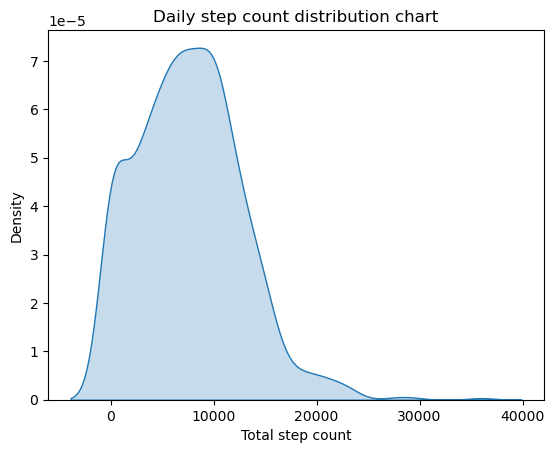

In [16]:
sns.kdeplot(data["TotalStepCount"], fill=True)
plt.xlabel('Total step count')
plt.ylabel('Density')
plt.title('Daily step count distribution chart')
plt.show()

The following code selects the days when the total number of steps is greater than 100.

In [17]:
data = data[data["TotalStepCount"] >= 100]

For the new data set, the number of data columns has been reduced from 931 rows to 844 rows.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 930
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Id               844 non-null    int64         
 1   Date             844 non-null    datetime64[ns]
 2   TotalStepCount   844 non-null    int64         
 3   StepTotal_6to12  844 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 33.0 KB


## Data Visualization

We extract the data of two columns which contain data related to the number of steps (or total steps) and contain data related to the number of steps taken during a specific time period (6am to 12am), and then assign them to the y and x variables respectively. 

Two variables y and x will be used in the subsequent code to perform linear regression analysis and draw a scatter plot to visualize the relationship between these two variables. 

In [ ]:
y = data['TotalStepCount']
x = data['StepTotal_6to12']

We use correlation coefficients and simple linear regression (SLR) models to analyze the relationship between two variables and describe their trends.

The correlation coefficient is a statistical measure of the strength and direction of the linear relationship between two variables. The correlation coefficient is a value between -1 and 1, where 1 means a perfect positive correlation, -1 means a perfect negative correlation, and 0 means no linear relationship. In this case, the correlation coefficient is positive, which indicates a positive correlation between the variables StepTotal_6to12 and TotalStepCount. This means that when the number of steps increases between 6 a.m. and 12 a.m., the total number of steps also has a similar increasing trend.

The simple linear regression model is a statistical analysis method used to establish a linear relationship model between two variables. In our case, the SLR model is used to predict how the total number of steps (TotalStepCount) changes with the number of steps (StepTotal_6to12) from 6 a.m. to 12 a.m. The equation of the SLR model can be expressed as: $TotalStepCount = m * StepTotal6to12 + b$, it can be seen from the graph that m has a positive slope, which means that more steps between 6 am and 12 am are generally associated with a higher total step count.

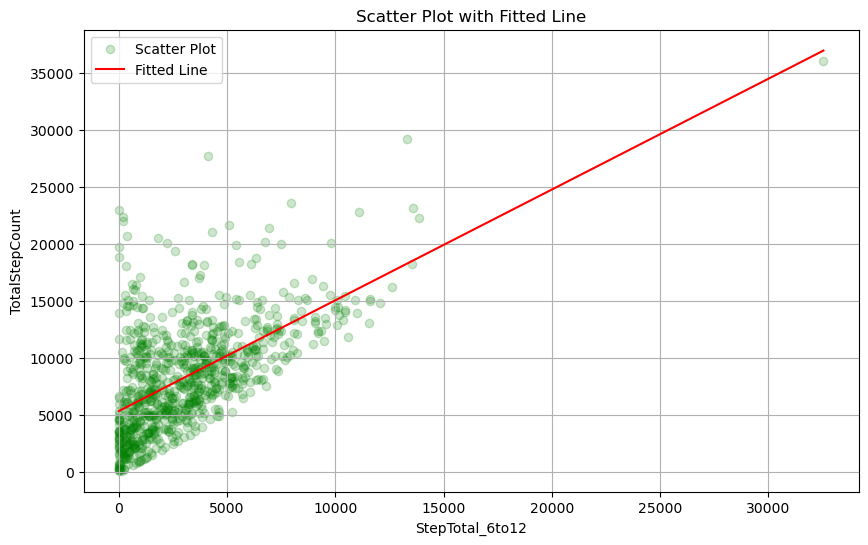

In [25]:
# import required library
from scipy.stats import pearsonr

# Calculate linear regression
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = polynomial(x_fit)
correlation_coefficient, _ = pearsonr(x, y)

# Draw and adjust the size of the figure
plt.figure(figsize=(10, 6))

plt.scatter(x, y, label='Scatter Plot',color = 'green', alpha = 0.2)
plt.plot(x_fit, y_fit, color='red', label='Fitted Line')

# Present correlation coefficient and SLR model
plt.xlabel('StepTotal_6to12')
plt.ylabel('TotalStepCount')
plt.title('Scatter Plot with Fitted Line')
plt.legend()
plt.grid(True)
plt.show()


We further verified the relationship through calculations, but from the plot and formulas we can find that the intercept is around 5000, which is still a large number and may contains some deviations.

In [27]:
# Print linear regression equation
print(f"Linear Regression Model: TotalStepCount = {coefficients[0]:.2f} * StepTotal_6to12 + {coefficients[1]:.2f}")

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

Linear Regression Model: TotalStepCount = 0.97 * StepTotal_6to12 + 5359.97
Correlation Coefficient: 0.58


### Classify and analyzation

First, the code groups the data by the "Id" column through the groupby function and calculates the median of the "StepTotal_6to12" column for each group, storing the result in median_per_id. Then, the median of all "Id" groups is calculated and stored in overall_median. This value represents the overall median.

In addition, divide "Ids" into two groups by comparing the "StepTotal_6to12" median of each "Id" group to the overall median:
- more_than_median_ids contains those "Ids" whose median is greater than or equal to the overall median.
- less_than_median_ids contains those "Ids" whose median is less than the overall median.

This classification splits the "Id" groups into two groups based on how their "StepTotal_6to12" medians relate to the overall median, allowing comparison of trends in their medians. This helps analyze trends and distributions between different groups for further data analysis and decision-making.

In [30]:
median_per_id = data.groupby("Id")["StepTotal_6to12"].median()
overall_median = np.median(median_per_id)

more_than_median_ids = median_per_id[median_per_id >= overall_median].index
less_than_median_ids = median_per_id[median_per_id < overall_median].index

The following step uses grouping again, this time by "Id" and calculates the median of the "TotalStepCount" column for each "Id" group, storing the results in more_than_median_data and less_than_median_data. The data represents the median total number of steps for both sets of "Ids", which are divided into groups above and below the overall median, and their distribution would be visualized by boxplots.

In [31]:
data_total = data.groupby("Id")["TotalStepCount"].median()

more_than_median_data = data_total[data_total.index.isin(more_than_median_ids)]
less_than_median_data = data_total[data_total.index.isin(less_than_median_ids)]

more_than_median_data = more_than_median_data.reset_index()
less_than_median_data = less_than_median_data.reset_index()

We use boxplots to compare the distribution for two sets of "Ids". The boxplot is a tool for visualizing the distribution of data, allowing us to observe patterns and differences related to the median total number of steps.

It can be found from the figure that the box plot of the "More than Median" group is above the "Less than Median" group. Moreover, the center line of the boxplot represents the median. Comparing the median positions of two sets of "Ids" can reveal their differences. It can be seen from the figure that the midline of the boxplot of 'more than median' is located above the boxplot of 'less than median', which means that the group has a higher median total number of steps. These shows that people who take more steps in the morning take more steps throughout the day.

<Figure size 1000x600 with 0 Axes>

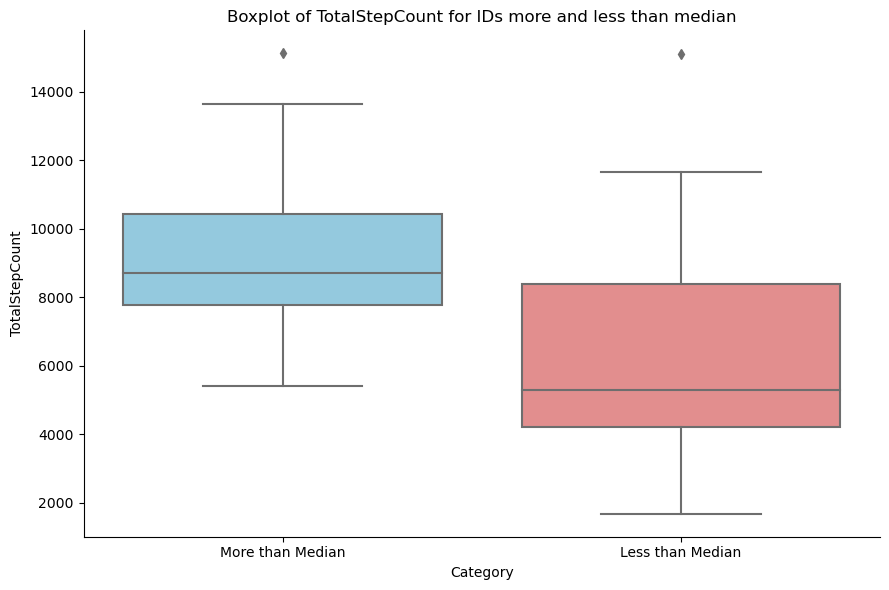

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

more_than_median_data['Category'] = 'More than Median'
less_than_median_data['Category'] = 'Less than Median'

combined_data = pd.concat([more_than_median_data, less_than_median_data])
plt.figure(figsize=(10, 6))

sns.catplot(x='Category', y='TotalStepCount', data=combined_data, kind='box', palette=['skyblue', 'lightcoral'], height=6, aspect=1.5)
plt.xlabel('Category')
plt.ylabel('TotalStepCount')
plt.title('Boxplot of TotalStepCount for IDs more and less than median')
plt.tight_layout()
plt.show()

### Hypothesis verification

$H_0$: Morning step count does not related to total step count.

$H_1$: People who take more steps in the morning take more total steps.

We uses the Pearson correlation coefficient to measure the linear relationship between two sets of data. Based on the sign of the correlation coefficient, calculate the p value and perform hypothesis testing. If the p-value is less than the significance level alpha (usually 0.05), then the null hypothesis is rejected in favor of the alternative hypothesis, indicating that people who take more steps in the morning take more total steps. Otherwise, the null hypothesis cannot be rejected and it is considered that the two are unrelated.

In [65]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(more_than_median_data["TotalStepCount"], less_than_median_data["TotalStepCount"])
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: 2.648033831818025
p-value: 0.012617032262134663


As the p-value is less than the significance level (usually 0.05), the null hypothesis can be rejected, and the alternative hypothesis is accepted.

## Results

From the given box plot, it's clear that the median of the "More than Median" group is higher than that of the "Less than Median" group, indicating that individuals who walk more steps in the morning than the median also take more steps throughout the day. The t-test further confirms this observation, as the p-value (0.0126) is less than 0.05, indicating statistical significance. Both the box plot and the t-test show a positive correlation between morning activity and daily steps.

# Summary

Through data processing, box plot visualization, and t-test statistical testing, we found that those who take more steps in the morning also take more steps throughout the day. This observation suggests that increasing morning activity could be an effective way to increase daily activity and exercise. However, this is just a correlational observation, and further experiments and analyses are required to determine the causality between the two.